In [139]:
# Import Necessary Modules
import glob
import matplotlib.pyplot as plt 
from skimage import io
import numpy as np
import math
%matplotlib inline 

In [140]:
#This function reads in all images in catsfolder/ and dogsfolder/. 
#Each 64 x 64 image is reshaped into a length-4096 row vector. 
#These row vectors are stacked on top of one another to get two data
#matrices, each with 4096 columns. The first matrix cats consists of all
#the cat images as row vectors and the second matrix dogs consists of all
#the dog images as row vectors.

def read_cats_dogs():
    
    # get image filenames
    cat_locs = glob.glob('catsfolder/*.jpg')
    dog_locs = glob.glob('dogsfolder/*.jpg')
    num_cats = len(cat_locs)
    num_dogs = len(dog_locs)
    
    # initialize empty arrays
    cats = np.zeros((num_cats,64*64))
    dogs = np.zeros((num_dogs,64*64))
              
    #reshape images into row vectors and stack into a matrix 
    for i in range(num_cats):
        img = cat_locs[i]
        im = io.imread(img)
        im = im.reshape(64*64)
        cats[i,:] = im

    for i in range(num_dogs):
        img = dog_locs[i]
        im = io.imread(img)
        im = im.reshape(64*64)
        dogs[i,:] = im

    return cats, dogs

In [141]:
#This function takes in an n x 4096 data matrix X and an index i. It extracts
#the ith row of X and displays it as a grayscale 64 x 64 image.

def show_image(X, i):
    #select image
    image = X[i,:]
    #reshape make into a square
    image = image.reshape((64,64))
    #display the image
    plt.imshow(image,'gray')

In [142]:
#Read in data 
cats,dogs = read_cats_dogs()
num_cats = cats.shape[0]
num_dogs = dogs.shape[0]

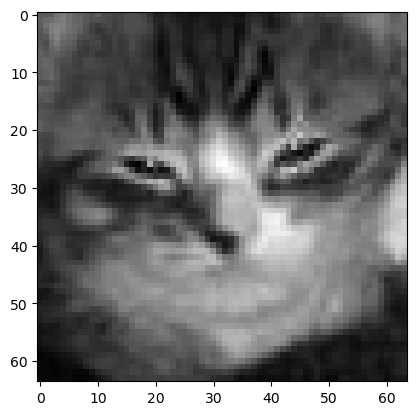

In [143]:
#Show individual cat image. Change the index from 1 to 1000 to explore the dataset.
show_image(cats,312)

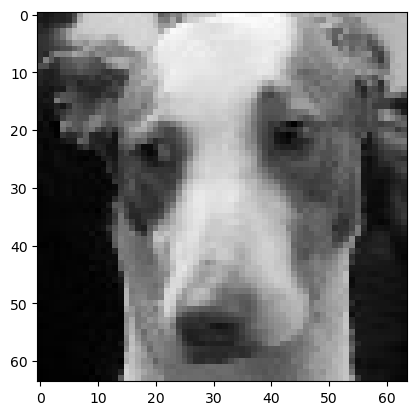

In [144]:
#Show individual dog image. Change the index from 1 to 1000 to explore the dataset.
show_image(dogs,158)

In [145]:
#Split dataset into training and test data.
cats_train = cats[0:math.floor(num_cats/2),:]
cats_test = cats[math.floor(num_cats/2):num_cats,:]
dogs_train = dogs[0:math.floor(num_dogs/2),:]
dogs_test = dogs[math.floor(num_dogs/2):num_dogs,:]
num_cats_test = cats_test.shape[0]
num_dogs_test = dogs_test.shape[0]

In [146]:
#This function takes in a data matrix and outputs the 
#average row vector.

def vector_average(datamatrix):
    
    row_avg = np.mean(datamatrix, axis=0)
    row_avg = row_avg.reshape(1, 4096)
    print(row_avg.shape)
    #Your code should go above this line.
    if (row_avg.shape[0]!=1): 
        raise Exception("The variable avg_row is not a row vector.")
    elif (row_avg.shape[1]!=datamatrix.shape[1]):
        raise Exception("The variable row_avg does not have the same number of columns as the data matrix input.")

    return row_avg

(1, 4096)
(1, 4096)


Text(0.5, 1.0, 'Average Cat')

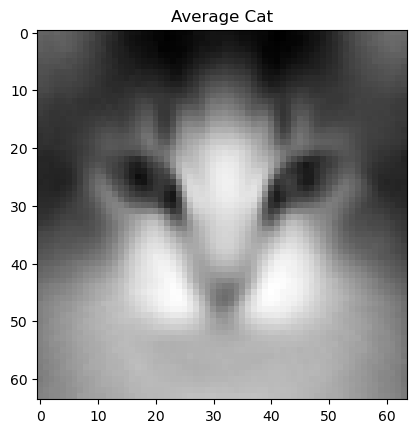

In [147]:
#Problem 3.4(a)
#Calculate average cat and dogs images on the training data.
avg_cat = vector_average(cats_train)
avg_dog = vector_average(dogs_train)
show_image(avg_cat,0)
plt.title('Average Cat')

Text(0.5, 1.0, 'Average Dog')

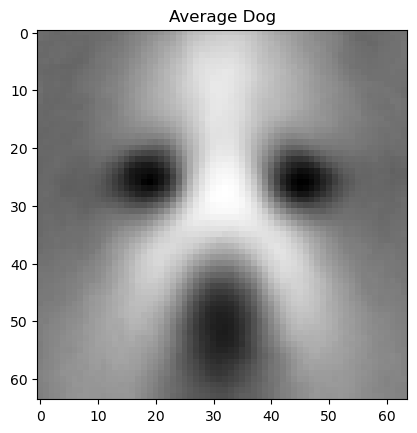

In [148]:
show_image(avg_dog,0)
plt.title('Average Dog')

In [149]:
#This function takes in a pet image currentpet (as a row vector) and 
#two additional row vectors, avg_cat and avg_dog, corresponding to
#the average cat and dog images.
#The function should output 0 as its guess if currentpet is closer to
#avg_cat than avg_dog, and 1 as its guess if currentpet is closer to 
#avg_dog than avg_cat. In the case of a tie, it should guess 1.

def hw3_classifier(currentpet,avg_cat,avg_dog):
    
    difference_cat = np.subtract(avg_cat, currentpet)
    difference_dog = np.subtract(avg_dog, currentpet)
    
    abs_difference_cat = np.absolute(difference_cat)
    abs_difference_dog = np.absolute(difference_dog)
    
    sum_cat = np.sum(abs_difference_cat)
    sum_dog = np.sum(abs_difference_dog)
    
    if (sum_cat > sum_dog):
        guess = 1
    elif (sum_dog > sum_cat):
        guess = 0
    else:
        guess = 1
    
    #Your code should go above this line.
    if ((guess!=0) & (guess!=1)):
        raise Exception("The variable guess is not 0 or 1.")
        
    return guess

In [153]:
#Problem 3.4(b)
#Classify test images.
cat_test_guesses = np.zeros((num_cats_test,1))
dog_test_guesses = np.zeros((num_dogs_test,1))
for i in range(num_cats_test):
    current_cat = cats_test[i,:]
    cat_test_guesses[i] = hw3_classifier(current_cat,avg_cat,avg_dog)

for i in range(num_dogs_test):
    current_dog = dogs_test[i,:]
    dog_test_guesses[i] = hw3_classifier(current_dog,avg_cat,avg_dog)

In [154]:
#This function takes in the column vectors of cat and dog test guesses and outputs 
#the corresponding fractions of misclassified images. Specificallly, cat_error_rate
#is the fraction of 1's in cats_test_guesses and dog_error_rate is the fraction of
#0's in dogs_test_guesses.

def hw3_error_rate(cats_test_guesses,dogs_test_guesses):
    
    cat_count = 0
    dog_count = 0
    print(len(cats_test_guesses))
    for i in range(len(cats_test_guesses)):
        if (cat_test_guesses[i] == 1):
            cat_count += 1
            
    for i in range(len(dogs_test_guesses)):
        if (dogs_test_guesses[i] == 0):
            dog_count += 1
            
    cat_error_rate = cat_count/500
    dog_error_rate = dog_count/500
    #Your code should go above this line.
    if ((cat_error_rate < 0) | (cat_error_rate > 1)):
        raise Exception("The variable cat_error_rate is not between 0 and 1.")
    elif ((dog_error_rate < 0) | (dog_error_rate > 1)):
        raise Exception("The variable dog_error_rate is not between 0 and 1.")
        
    return cat_error_rate, dog_error_rate

In [155]:
#Problem 3.4(c)
#Calculate the fraction of cat and dog images that are misclassified by our
#simple "closest-average" classifier.
cat_error_rate, dog_error_rate = hw3_error_rate(cat_test_guesses,dog_test_guesses)
#Print fractions to the display.
print("The fraction of cat images misclassified by the closest average is " + str(cat_error_rate) + ".")
print("The fraction of dog images misclassified by the closest average is " + str(dog_error_rate) + ".")

500
The fraction of cat images misclassified by the closest average is 0.184.
The fraction of dog images misclassified by the closest average is 0.238.
